In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
team = True

In [3]:
if team:
    goldstandard="team"
    sheet=1
else:
    goldstandard="anna+philipp"
    sheet=0

In [4]:
from pici.pici import Pici
from pici.communities.oem import OEMCommunityFactory
from pici.communities.osm import OSMCommunityFactory
from pici.communities.preciousplastic import PPCommunityFactory
import pandas as pd

from pici.labelling import InnovationLabels
import seaborn as sns


import plotly.express as ex

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'graph_tool', 'infomap', 'karateclub'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'ASLPAw', 'karateclub'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


In [5]:
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
pd.options.plotting.backend = "plotly"
plt.rcParams['figure.dpi'] = 200

In [7]:
pici = Pici(
    communities={
        'OpenEnergyMonitor': OEMCommunityFactory,
        'OpenStreetMap': OSMCommunityFactory,
        'PreciousPlastic': PPCommunityFactory,
    },
    labels=[
        InnovationLabels(
            pd.read_excel("../test_integrated_labels.xlsx", sheet_name=sheet),
        ),
        InnovationLabels().from_limesurvey(
            pd.read_excel("../results-all-surveys_2022-08-31.xlsx"),
            drop_labellers=["Test","test"]
        )
    ],
    cache_dir='../../../cache',
    start='2017-01-01',
    end='2019-01-01',
    cache_nrows=500
)

In [8]:
label_stats = pici.labels.labels[0].stats

In [9]:
print(pici.labels.labels[0])

<class 'pici.labelling.InnovationLabels'>
   Level: topics
   Labelled entities: 1562
   Labels (cols): 8
   Labellers: 15
   Communities: 3



In [10]:
pici.labels.labels[0].data.to_csv('flattened_results-664322-815628_2022-08-16.csv')

In [11]:
pici.labels.labels[0].data

,labeller,community_name,url,label_idea,label_evaluation,label_implementation,label_modification,label_improvement,label_potential,label_any_activity,label_has_potential,id
0,team,OpenEnergyMonitor,https://community.openenergymonitor.org/t/iota...,False,False,False,False,False,0,False,False,6129
1,team,OpenEnergyMonitor,https://community.openenergymonitor.org/t/new-...,False,False,True,True,True,1,True,True,6402
2,team,OpenEnergyMonitor,https://community.openenergymonitor.org/t/read...,True,True,True,True,False,1,True,True,4165
3,team,OpenEnergyMonitor,https://community.openenergymonitor.org/t/graf...,True,True,True,True,True,2,True,True,9829
4,team,OpenEnergyMonitor,https://community.openenergymonitor.org/t/lots...,False,False,False,False,False,0,False,False,6749
...,...,...,...,...,...,...,...,...,...,...,...,...
257,cmcuza@gmail.com,PreciousPlastic,https://davehakkens.nl/community/forums/topic/...,False,False,False,True,False,NaN,True,False,recycle-hips-in-compression-moldung-bubbles
258,cmcuza@gmail.com,PreciousPlastic,https://davehakkens.nl/community/forums/topic/...,False,False,False,False,False,NaN,False,False,compression-machine-oven-temp-control
259,cmcuza@gmail.com,OpenStreetMap,https://forum.openstreetmap.org/viewtopic.php?...,False,False,False,False,False,0,False,False,62834
260,cmcuza@gmail.com,PreciousPlastic,https://davehakkens.nl/community/forums/topic/...,False,False,False,False,False,0,False,False,alternatives-for-shredder-motor


In [12]:
label_stats.label_correlation()

,label_idea,label_evaluation,label_implementation,label_modification,label_improvement,label_any_activity,label_has_potential
label_idea,1.000000,0.648628,0.288014,0.317774,0.232726,0.718488,0.590918
label_evaluation,0.648628,1.000000,0.394659,0.445748,0.312158,0.742205,0.548887
label_implementation,0.288014,0.394659,1.000000,0.365792,0.260904,0.399806,0.283612
label_modification,0.317774,0.445748,0.365792,1.000000,0.467128,0.516109,0.348995
label_improvement,0.232726,0.312158,0.260904,0.467128,1.000000,0.412276,0.289756
label_any_activity,0.718488,0.742205,0.399806,0.516109,0.412276,1.000000,0.538275
label_has_potential,0.590918,0.548887,0.283612,0.348995,0.289756,0.538275,1.000000


In [13]:
label_stats.plot_label_correlation()

In [14]:
label_stats.label_counts(normalize=True)

label_idea              0.376440
label_evaluation        0.391805
label_implementation    0.157490
label_modification      0.237516
label_improvement       0.165813
label_any_activity      0.539052
label_has_potential     0.294494
dtype: float64

In [15]:
label_stats.label_counts(normalize=True).plot(kind='bar')

In [16]:
label_stats.label_counts_by_labeller(normalize=True)

,label_idea,label_evaluation,label_implementation,label_modification,label_improvement,label_any_activity,label_has_potential
labeller,,,,,,,
Annabanana,0.600000,0.400000,0.300000,0.100000,0.000000,0.600000,0.600000
Jonathan1.732,0.348315,0.258427,0.089888,0.067416,0.044944,0.370787,0.337079
Larilu,0.266272,0.260355,0.088757,0.053254,0.023669,0.295858,0.272189
Phoebetan310@gmail.com,0.000000,0.000000,0.400000,0.000000,0.000000,0.400000,0.200000
cmcuza@gmail.com,0.069124,0.013825,0.064516,0.059908,0.009217,0.165899,0.092166
elisagleu@gmail.com,0.370370,0.641975,0.395062,0.259259,0.283951,0.740741,0.493827
f.hetyei@yahoo.de,0.750000,0.750000,0.500000,0.500000,0.250000,1.000000,1.000000
mr.kiborg468@mail.ru,0.250000,0.000000,0.250000,0.250000,0.000000,0.750000,0.750000
niilay.p@gmail.com,0.133333,0.300000,0.333333,0.166667,0.333333,0.933333,0.000000


In [17]:
label_stats.plot_label_counts_by_labeller()

In [18]:
label_stats.plot_label_counts_by_labeller(normalize=False)

In [19]:
def plot_label_selections(labels, top_n=20, use_labels=None, exclude=[], figsize=(8,10), variant='topn'):
    colors = ["#fae6d9", "#60b3cc", "#00769a"]
    customPalette = sns.set_palette(sns.color_palette(colors))
    bluePalette = sns.color_palette("Blues", as_cmap=True)
    piPalette = sns.light_palette("#00769a", as_cmap=True)
    piPalette2 = sns.light_palette("#f17d32", as_cmap=True)
    sns.set(font="Corbel")

    def plt_label_heatmap(query=None, top_n=top_n, title="", cmap=None):
        if use_labels is None:
            labs = list(set(labels.labels.keys()) - set(exclude))
        else:
            labs = use_labels
        if query is not None:
            ldata = labels.data.query(query)[labs]
        else:
            ldata = labels.data[labs]

        if variant == 'topn':
            heatmap = ldata.value_counts(ascending=False, normalize=True).reset_index(name='freq').head(20).astype(float)
            annot = heatmap.copy()
            annot[labs] = ''
            annot['freq'] = (annot.freq * 100).apply(round).astype(str).apply(lambda s: s + ' %')
            annot.set_index('freq', inplace=True)
            #sns.heatmap(heatmap, annot=annot, fmt='', linewidths=1, ax=ax, cmap=cmap, cbar=False)
            heatmap['freq'] = (heatmap.freq * 100).apply(round).astype(str).apply(lambda s: s + '%')
            heatmap.columns = [c.replace("label_","") for c in heatmap.columns]
            heatmap = heatmap.set_index('freq').T
            sns.heatmap(heatmap, linewidths=1, ax=ax, cmap=cmap, cbar=False)
        elif variant == 'all':
            hm2 = ldata.astype(float)
            #hm2['sm'] = hm2.sum(axis=1)
            hm2 = hm2.sort_values(by=list(hm2.columns), ascending=True, na_position='first')
            hm2 = hm2[labs]
            hm2.columns = [c.replace("label_","") for c in hm2.columns]
            # sns.heatmap(heatmap, linewidths=1, ax=ax, cmap=cmap, cbar=False)
            sns.heatmap(hm2.T, linewidths=0, ax=ax, cmap=cmap, cbar=False)
            ax.invert_xaxis()
            ax.xaxis.set_tick_params(labelcolor='white', labelrotation=0)

        ax.set_title(title + f" (n={ldata.shape[0]})", weight='bold', size=16)
        ax.set_facecolor('thistle')
        #ax.tick_params(labelleft=False)
        for tick in ax.get_yticklabels():
            tick.set_rotation(0)
            tick.set_fontweight('bold')
            tick.set_color('grey')
        ax.tick_params(direction='inout')
        ax.yaxis.set_tick_params(labelsize=12)
        ax.set(xlabel=None)
        ax.set(ylabel=None)
        # ax.invert_yaxis()

    cs = labels.data.community_name.unique()
    fig, axes = plt.subplots(len(cs)+1,1, figsize=figsize)
    params = [(None, "total", piPalette)] + [
        (f'community_name == "{c}"', c, piPalette2) for c in cs
    ]
    for p, ax in zip(params, axes):
        plt_label_heatmap(
            query=p[0],
            title=p[1],
            cmap=p[2]
        )

    plt.tight_layout()

    #return fig

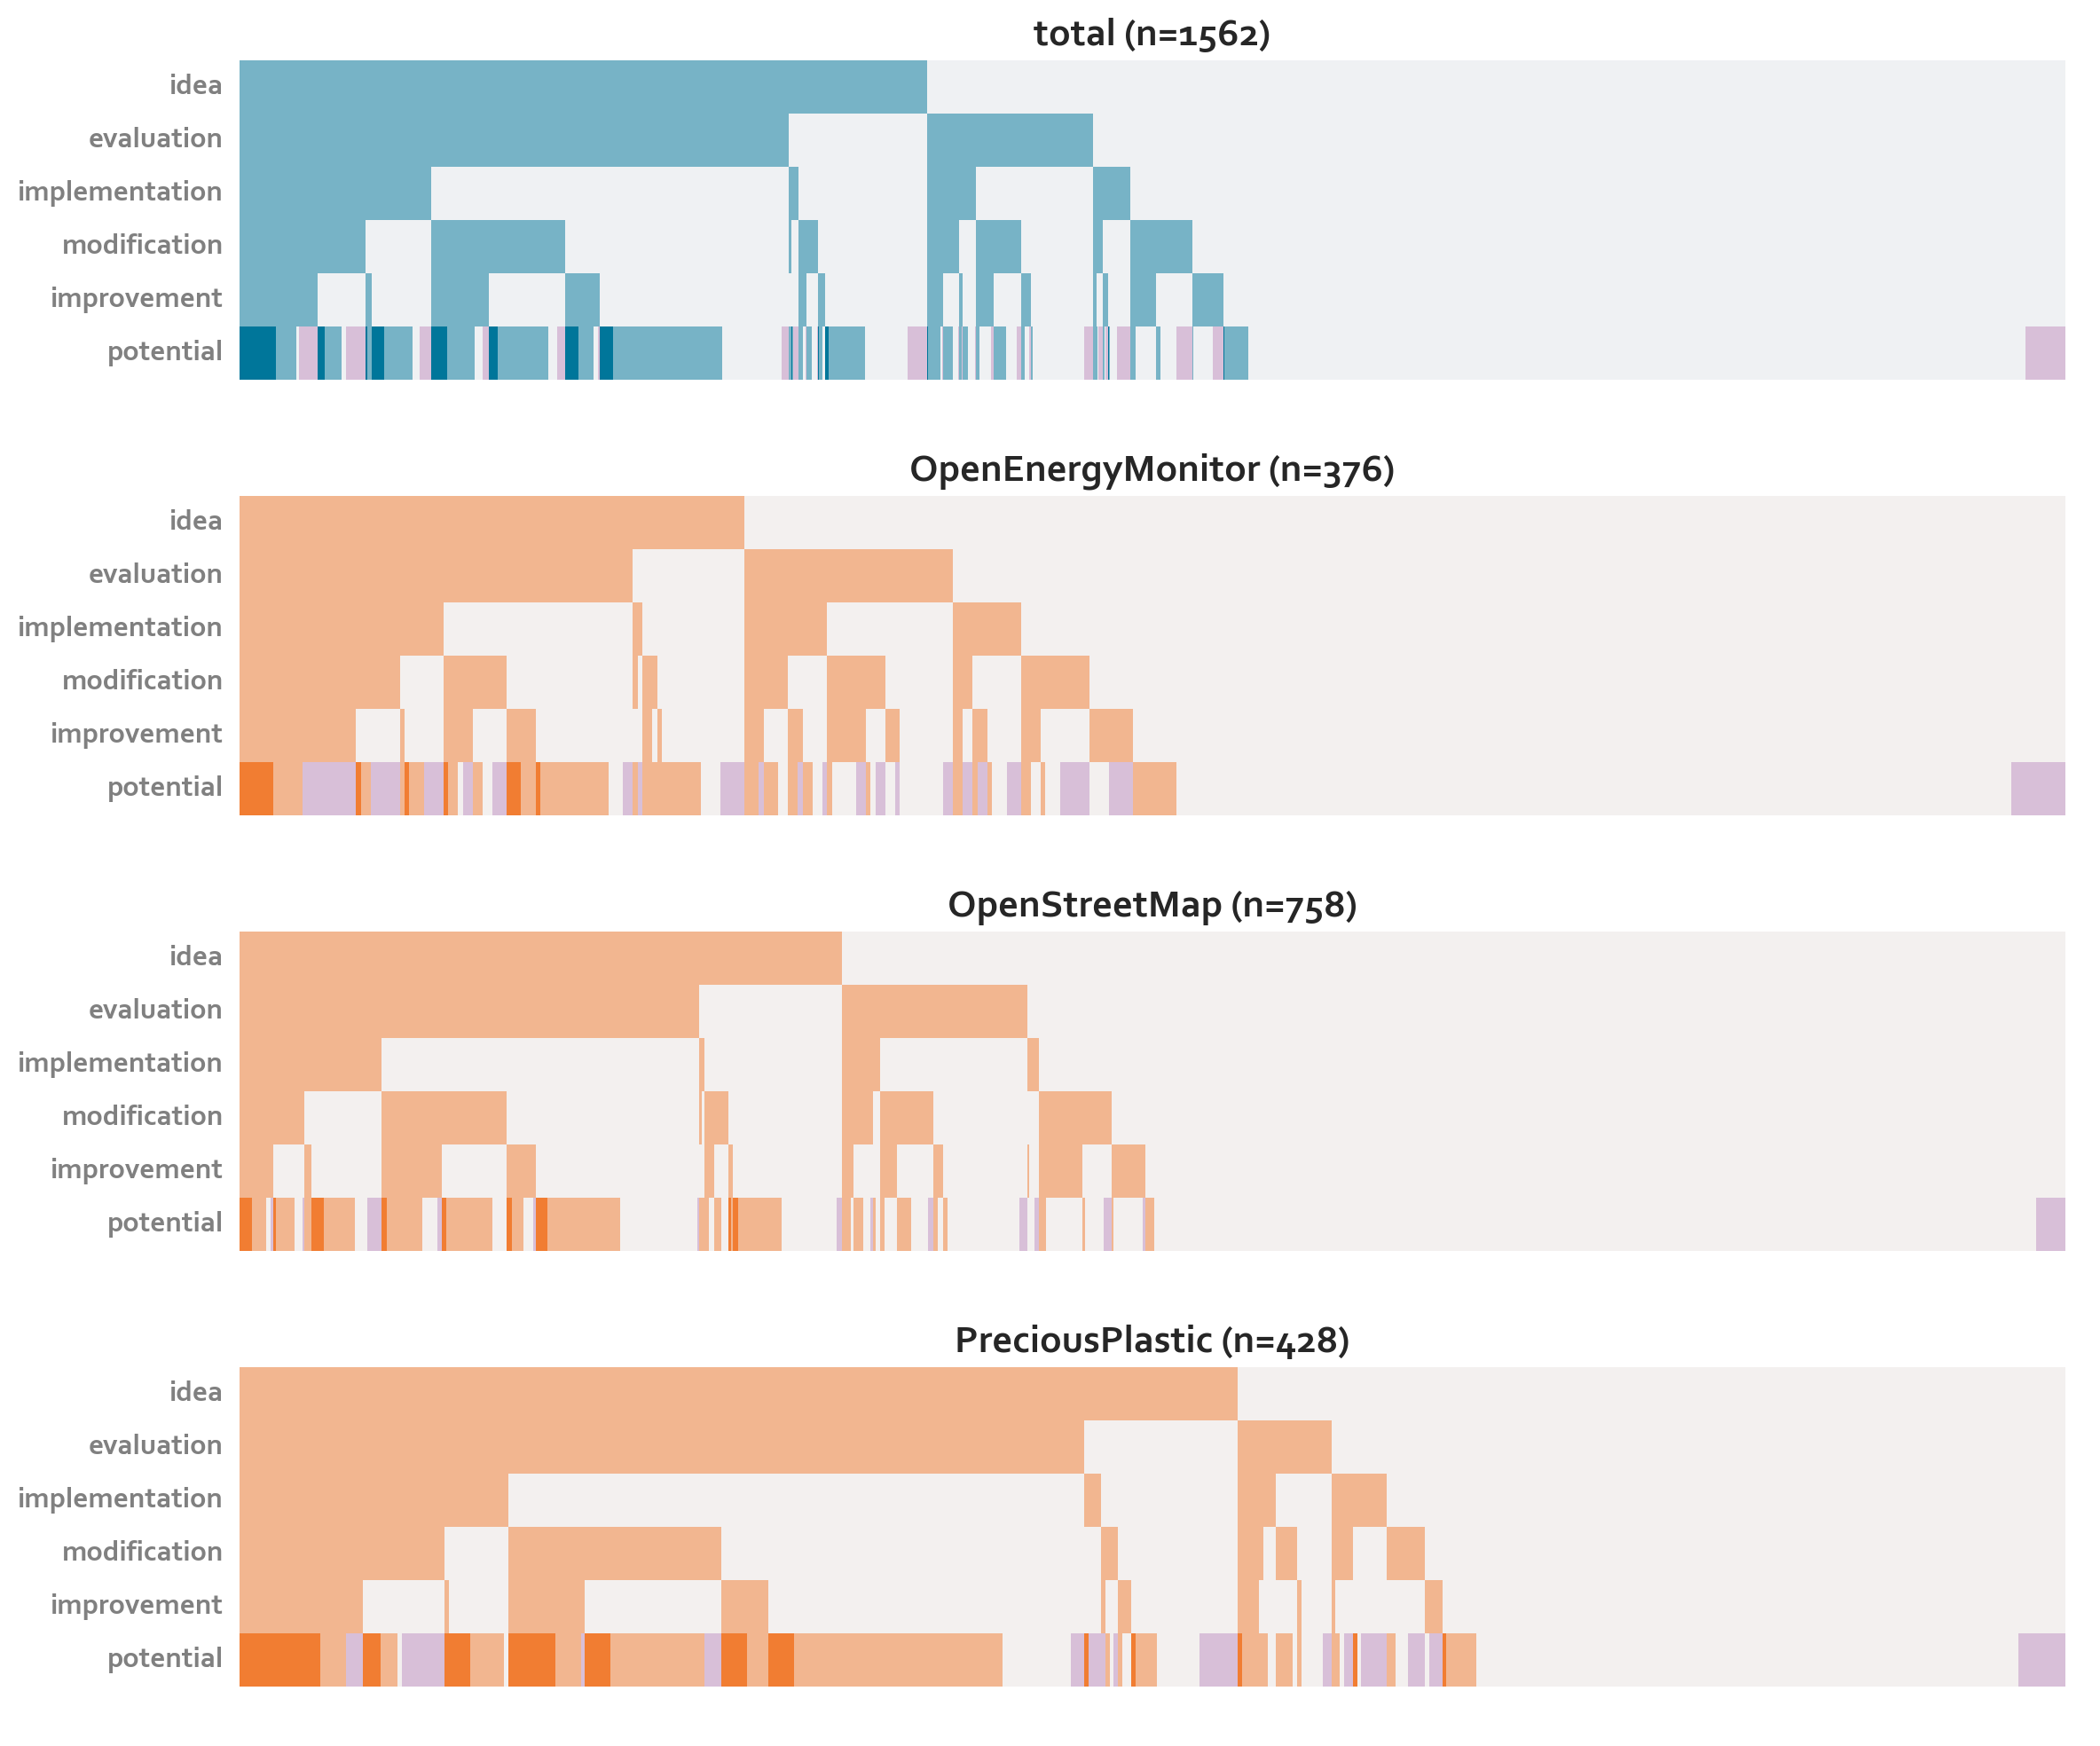

In [20]:
plot_label_selections(
    pici.labels.labels[0],
    use_labels=[
        "label_idea", "label_evaluation","label_implementation","label_modification","label_improvement","label_potential"
    ],
    variant='all',
    figsize=(12,10)
)

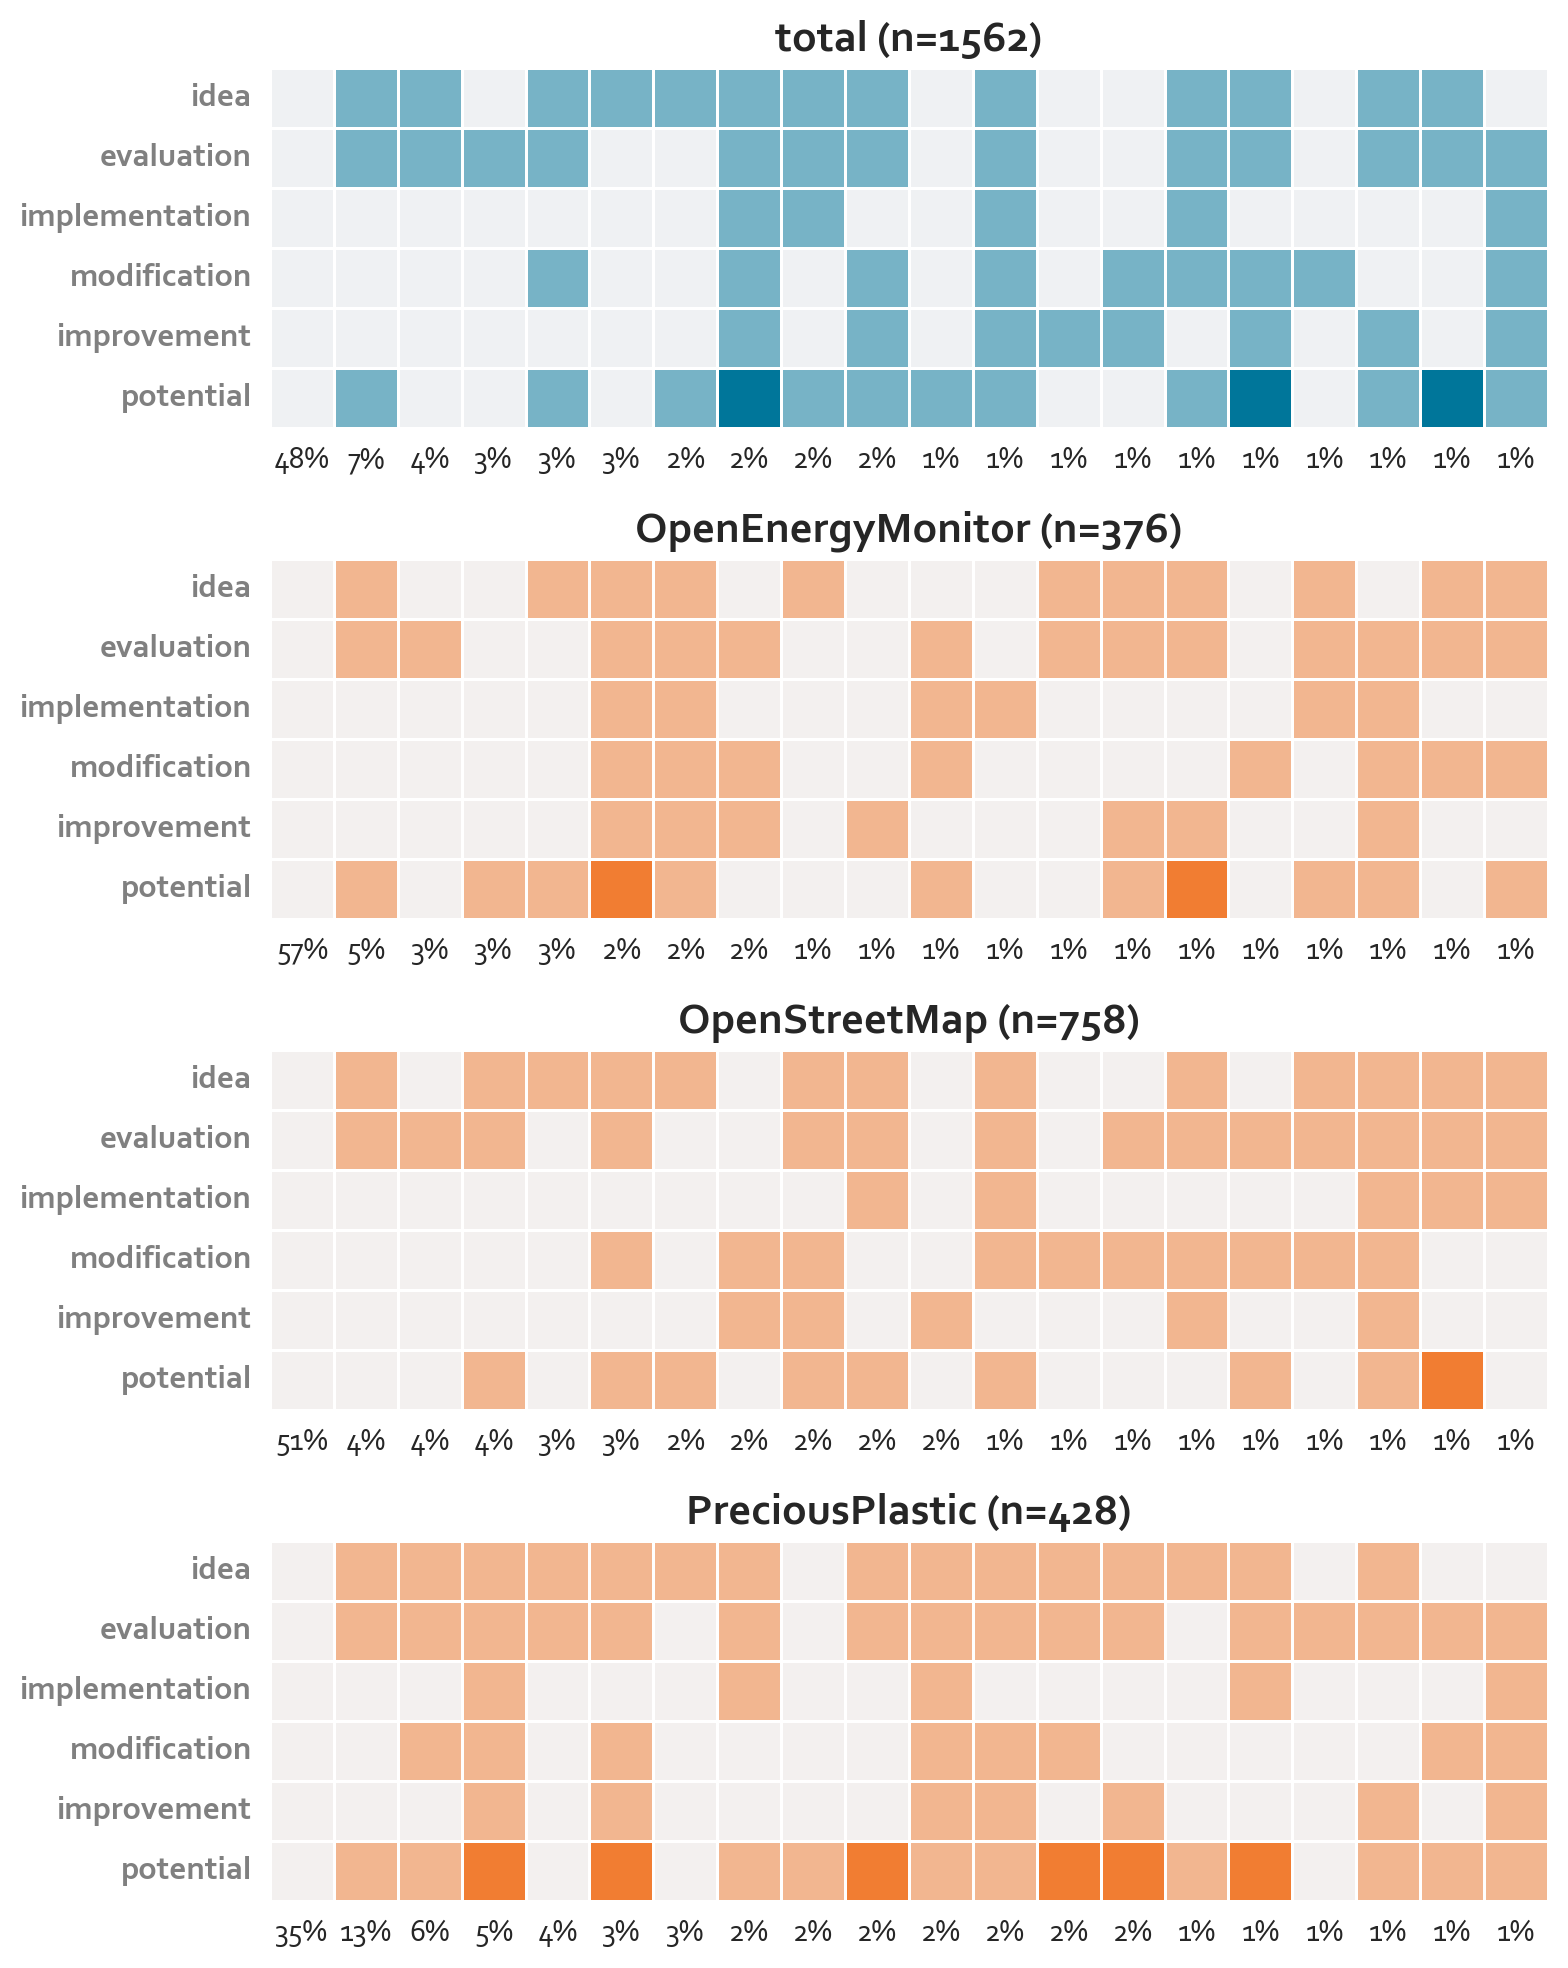

In [21]:
plot_label_selections(
    pici.labels.labels[0],
    use_labels=[
        "label_idea", "label_evaluation","label_implementation","label_modification","label_improvement","label_potential"
    ],
    variant='topn',
    figsize=(8,10),
    top_n=10
)

In [22]:
label_stats.interrater_agreement()

,% complete agreement,base n,Cohen kappa,Fleiss kappa,Krippendorff alpha
label_idea,0.627778,180.0,NaN,NaN,0.313836
label_evaluation,0.550000,180.0,NaN,NaN,0.240664
label_implementation,0.605556,180.0,NaN,NaN,-0.027778
label_modification,0.616667,180.0,NaN,NaN,0.080139
label_improvement,0.694444,180.0,NaN,NaN,0.020787
label_potential,0.641026,156.0,NaN,NaN,0.425054
label_any_activity,0.588889,180.0,NaN,NaN,0.253894
label_has_potential,0.638889,180.0,NaN,NaN,0.298276


In [23]:
label_stats.plot_interrater_agreement()

In [24]:
agr = label_stats.pairwise_interrater_agreement(goldstandard=goldstandard, min_comparisons=1)

In [25]:
agr.columns

Index(['% complete agreement', 'base n', 'Cohen kappa', 'Fleiss kappa',
       'Krippendorff alpha', 'labellers'],
      dtype='object')

In [26]:
agr.reset_index().drop(columns=['base n']).melt(id_vars=["index", "labellers"],value_vars=['% complete agreement', 'Cohen kappa', 'Fleiss kappa', 'Krippendorff alpha'])

,index,labellers,variable,value
0,label_idea,Jonathan1.732,% complete agreement,0.941176
1,label_evaluation,Jonathan1.732,% complete agreement,0.823529
2,label_implementation,Jonathan1.732,% complete agreement,0.588235
3,label_modification,Jonathan1.732,% complete agreement,0.647059
4,label_improvement,Jonathan1.732,% complete agreement,0.764706
...,...,...,...,...
375,label_implementation,niilay.p@gmail.com,Krippendorff alpha,-0.100000
376,label_modification,niilay.p@gmail.com,Krippendorff alpha,-0.100000
377,label_improvement,niilay.p@gmail.com,Krippendorff alpha,0.312500
378,label_any_activity,niilay.p@gmail.com,Krippendorff alpha,0.000000


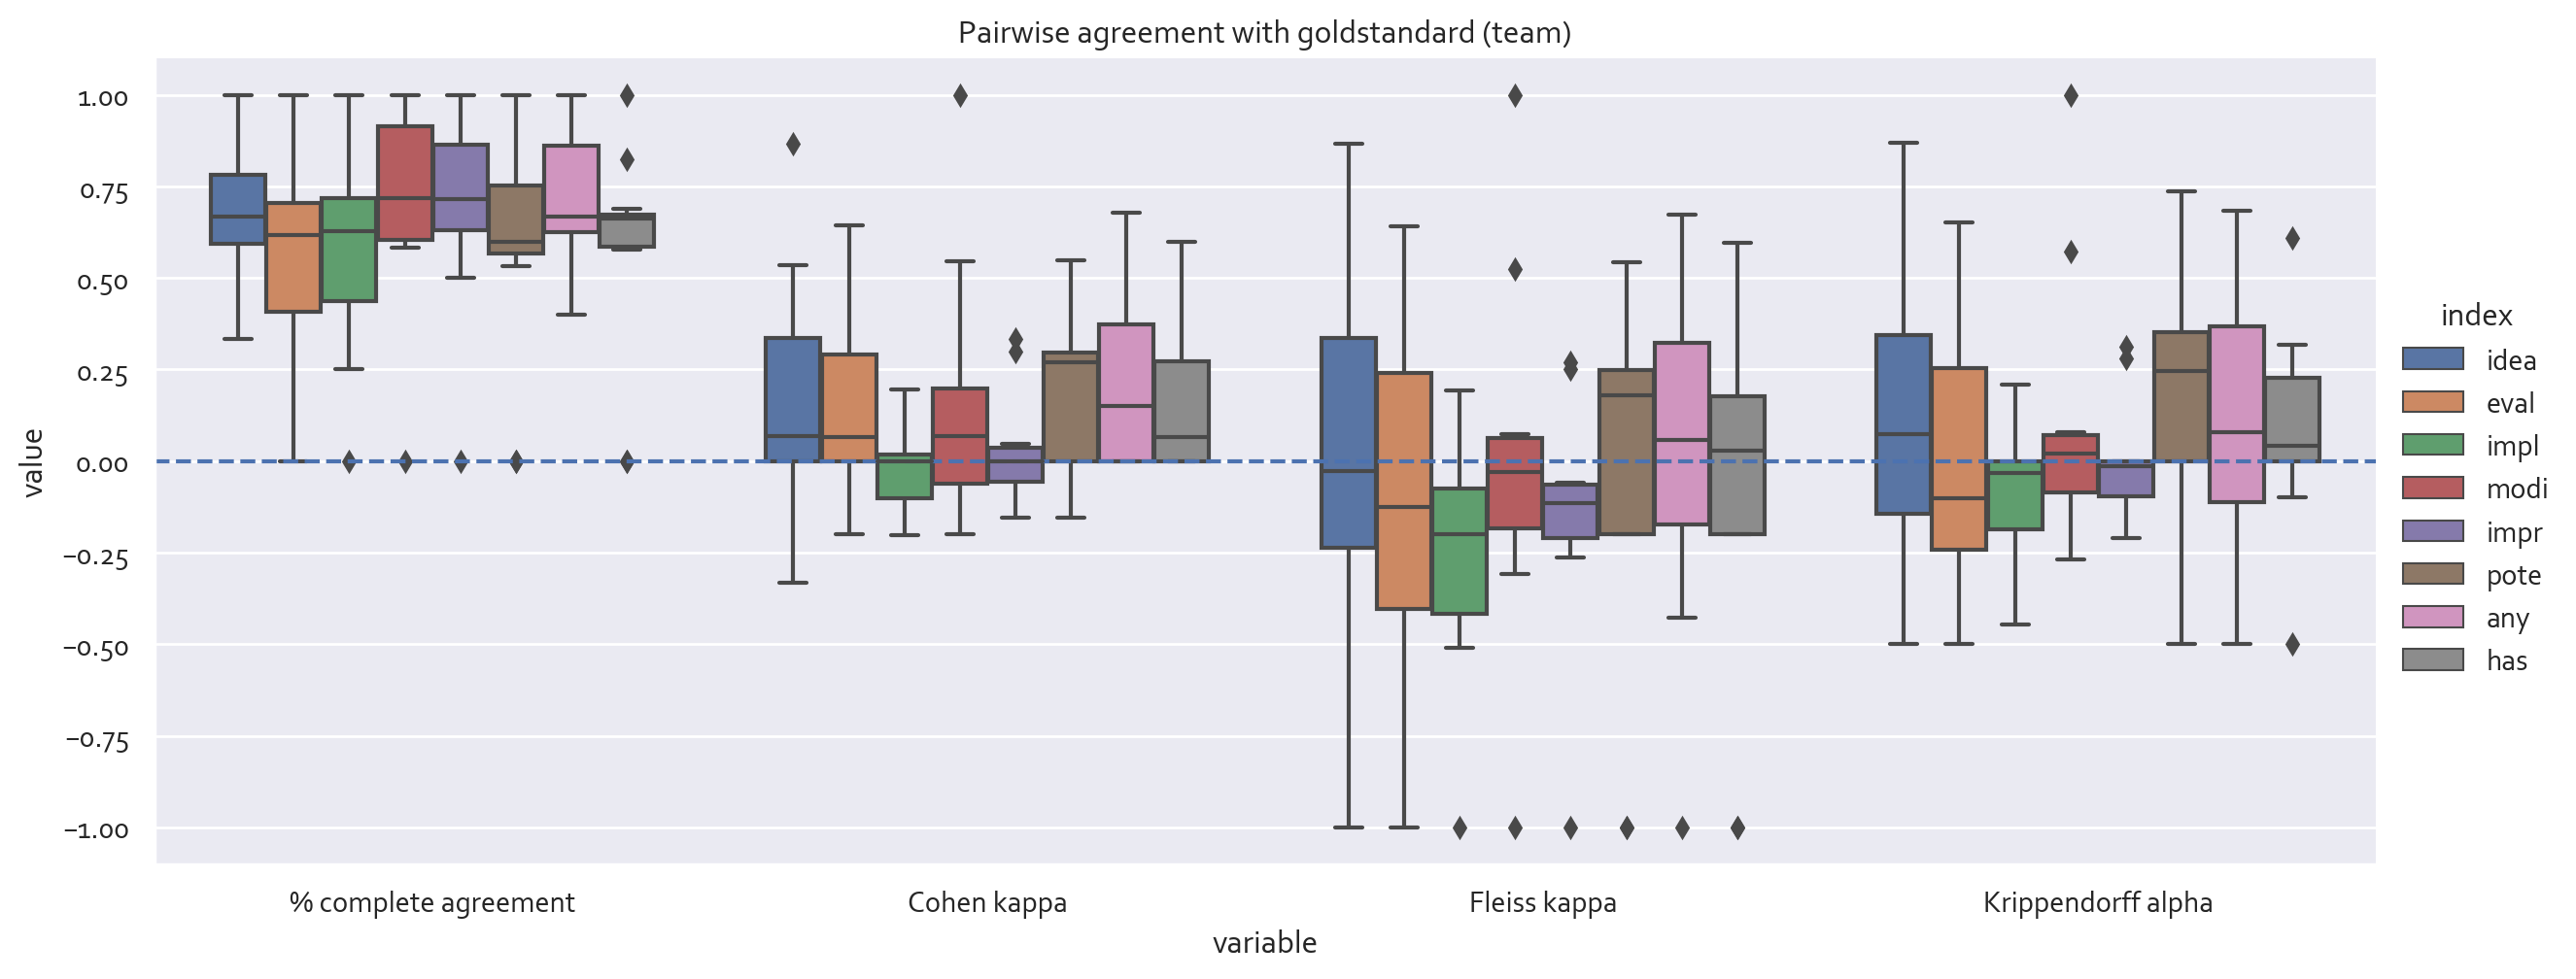

In [27]:
label_stats.plot_goldstandard_agreement(kind='label_boxplots', data=agr).set(
    title=f"Pairwise agreement with goldstandard ({goldstandard})"
)

Text(0.5, 0.98, 'Agreement with goldstandard (team)')

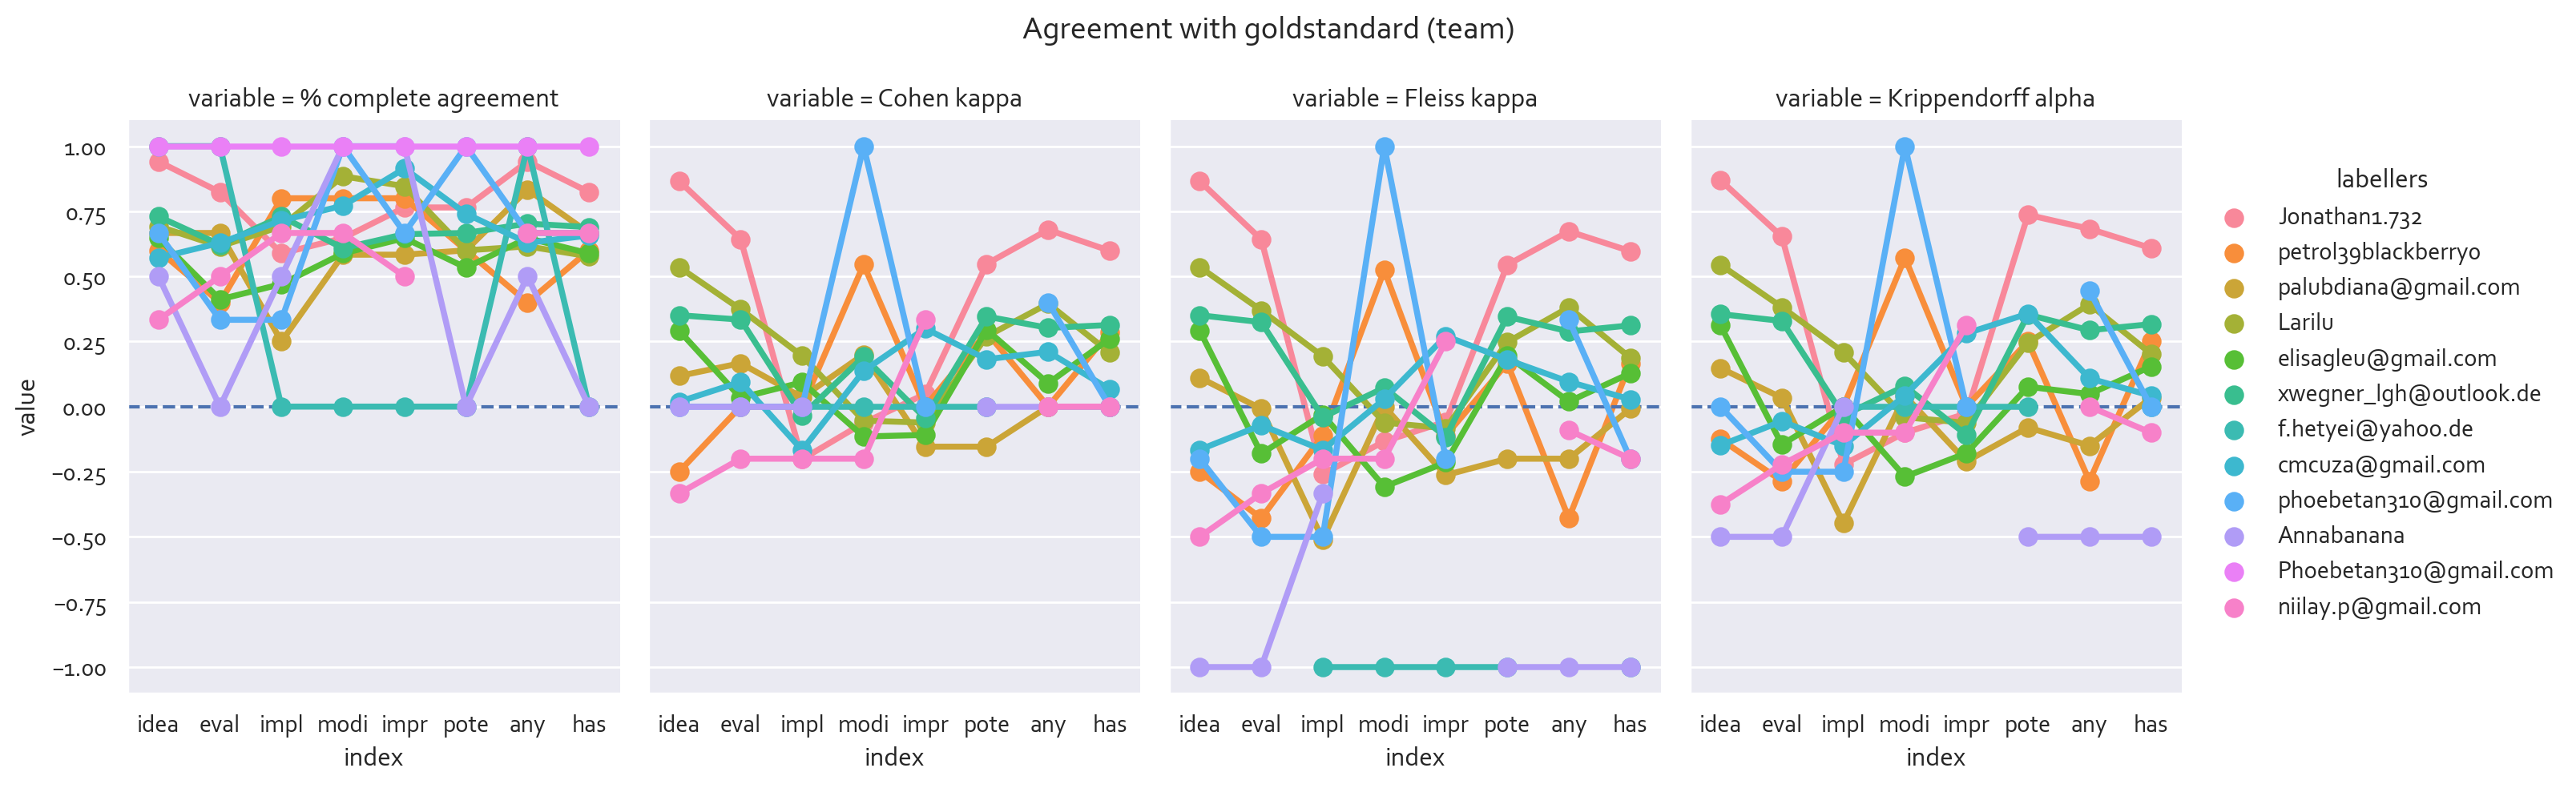

In [28]:
g = label_stats.plot_goldstandard_agreement(kind='labeller_points', data=agr)
g.fig.subplots_adjust(
    top=.85
)
g.fig.suptitle(
    f"Agreement with goldstandard ({goldstandard})"
)

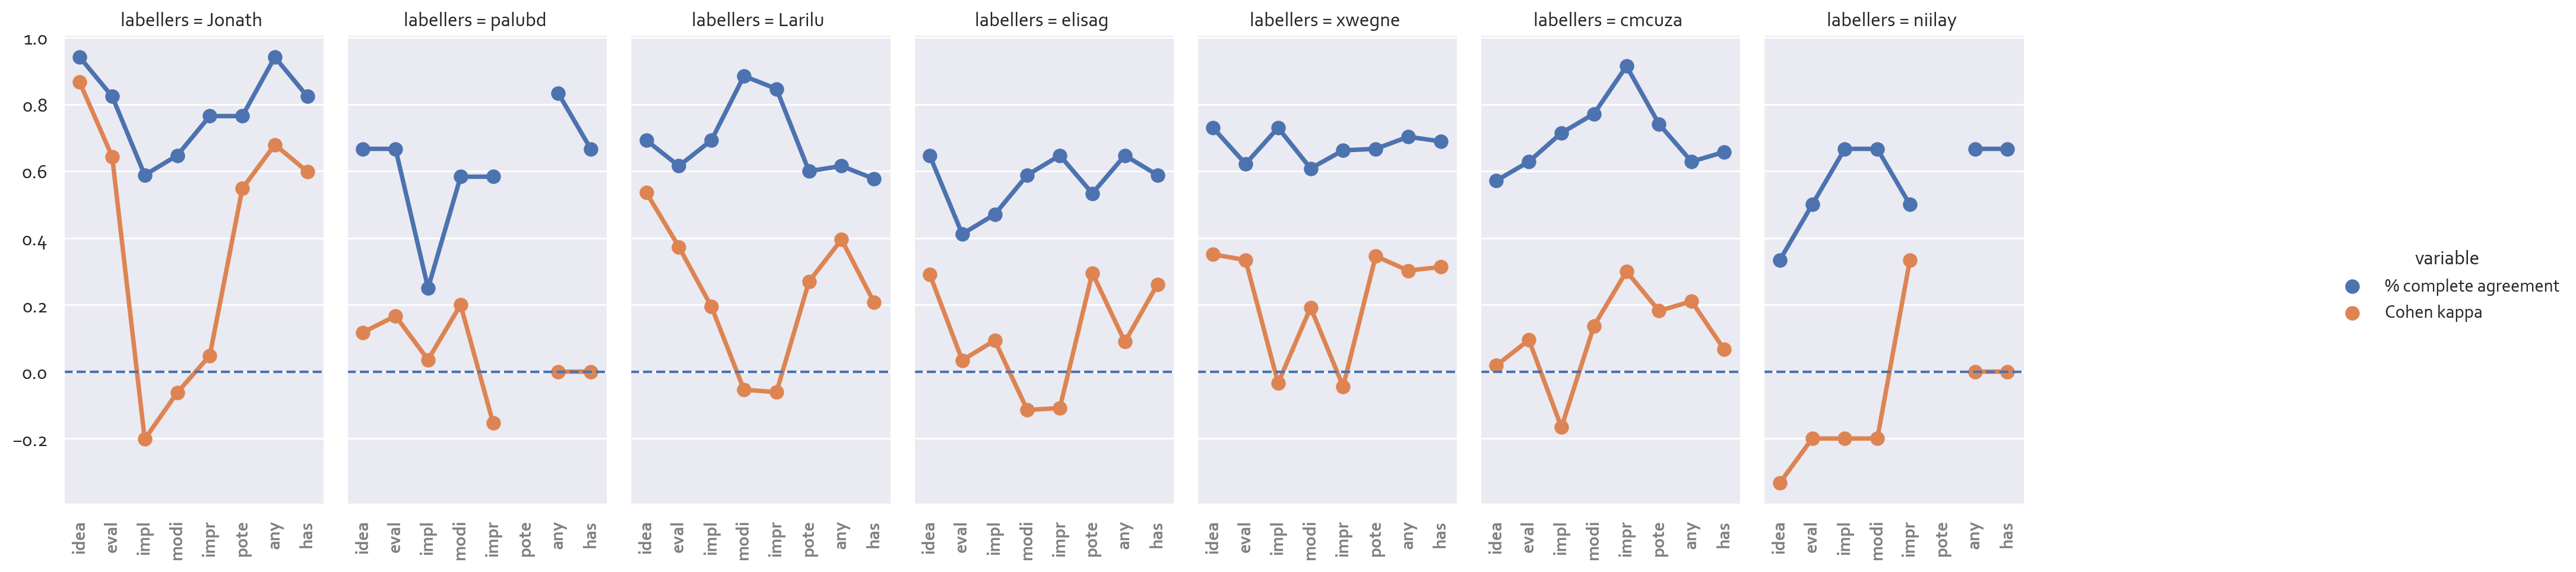

In [29]:
st = pici.labels.labels[0].stats

agr_n = agr
agr_n['labellers'] = agr_n.apply(
    lambda x: f"{x['labellers'][:6]} ({str(int(x['base n']))})",
    axis=1
)
d = st._melt_goldstandard_agreement(agr_n)
d['n'] = d.labellers.apply(lambda x: x.split("(")[1].split(")")[0]).astype(int)
d['labellers'] = d.labellers.apply(lambda x: x.split("(")[0])
d = d[
    (d.variable.isin(["Cohen kappa","% complete agreement"])) &
    #(~d['index'].isin(['any','has'])) &
    (d.n > 5)
]

g = sns.catplot(x="index", y="value", hue="variable",
                col='labellers', data=d, kind="point",
                figsize=(16,9), aspect=0.5, col_wrap=8)
for ax in g.axes.flatten():
    ax.axhline(0, ls='--')
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        tick.set_fontweight('bold')
        tick.set_color('grey')
    ax.yaxis.set_tick_params(labelsize=12)
    ax.set(xlabel=None)
    ax.set(ylabel=None)


In [30]:
agr

,% complete agreement,base n,Cohen kappa,Fleiss kappa,Krippendorff alpha,labellers
label_idea,0.941176,17.0,0.866142,0.865613,0.869565,Jonath (17)
label_evaluation,0.823529,17.0,0.643357,0.642105,0.652632,Jonath (17)
label_implementation,0.588235,17.0,-0.202020,-0.259259,-0.222222,Jonath (17)
label_modification,0.647059,17.0,-0.062500,-0.133333,-0.100000,Jonath (17)
label_improvement,0.764706,17.0,0.048000,-0.057778,-0.026667,Jonath (17)
...,...,...,...,...,...,...
label_implementation,0.666667,6.0,-0.200000,-0.200000,-0.100000,niilay (6)
label_modification,0.666667,6.0,-0.200000,-0.200000,-0.100000,niilay (6)
label_improvement,0.500000,6.0,0.333333,0.250000,0.312500,niilay (6)
label_any_activity,0.666667,6.0,0.000000,-0.090909,0.000000,niilay (6)


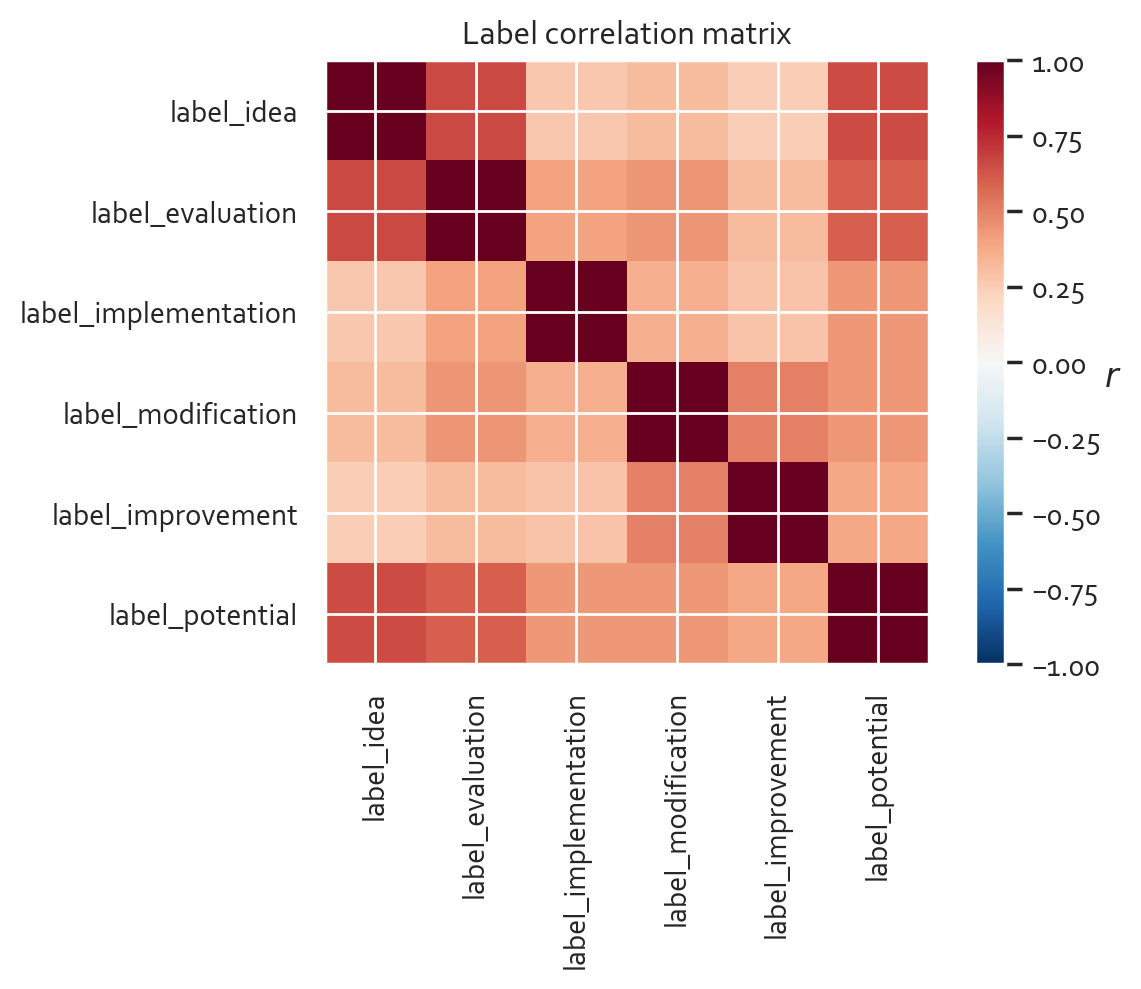

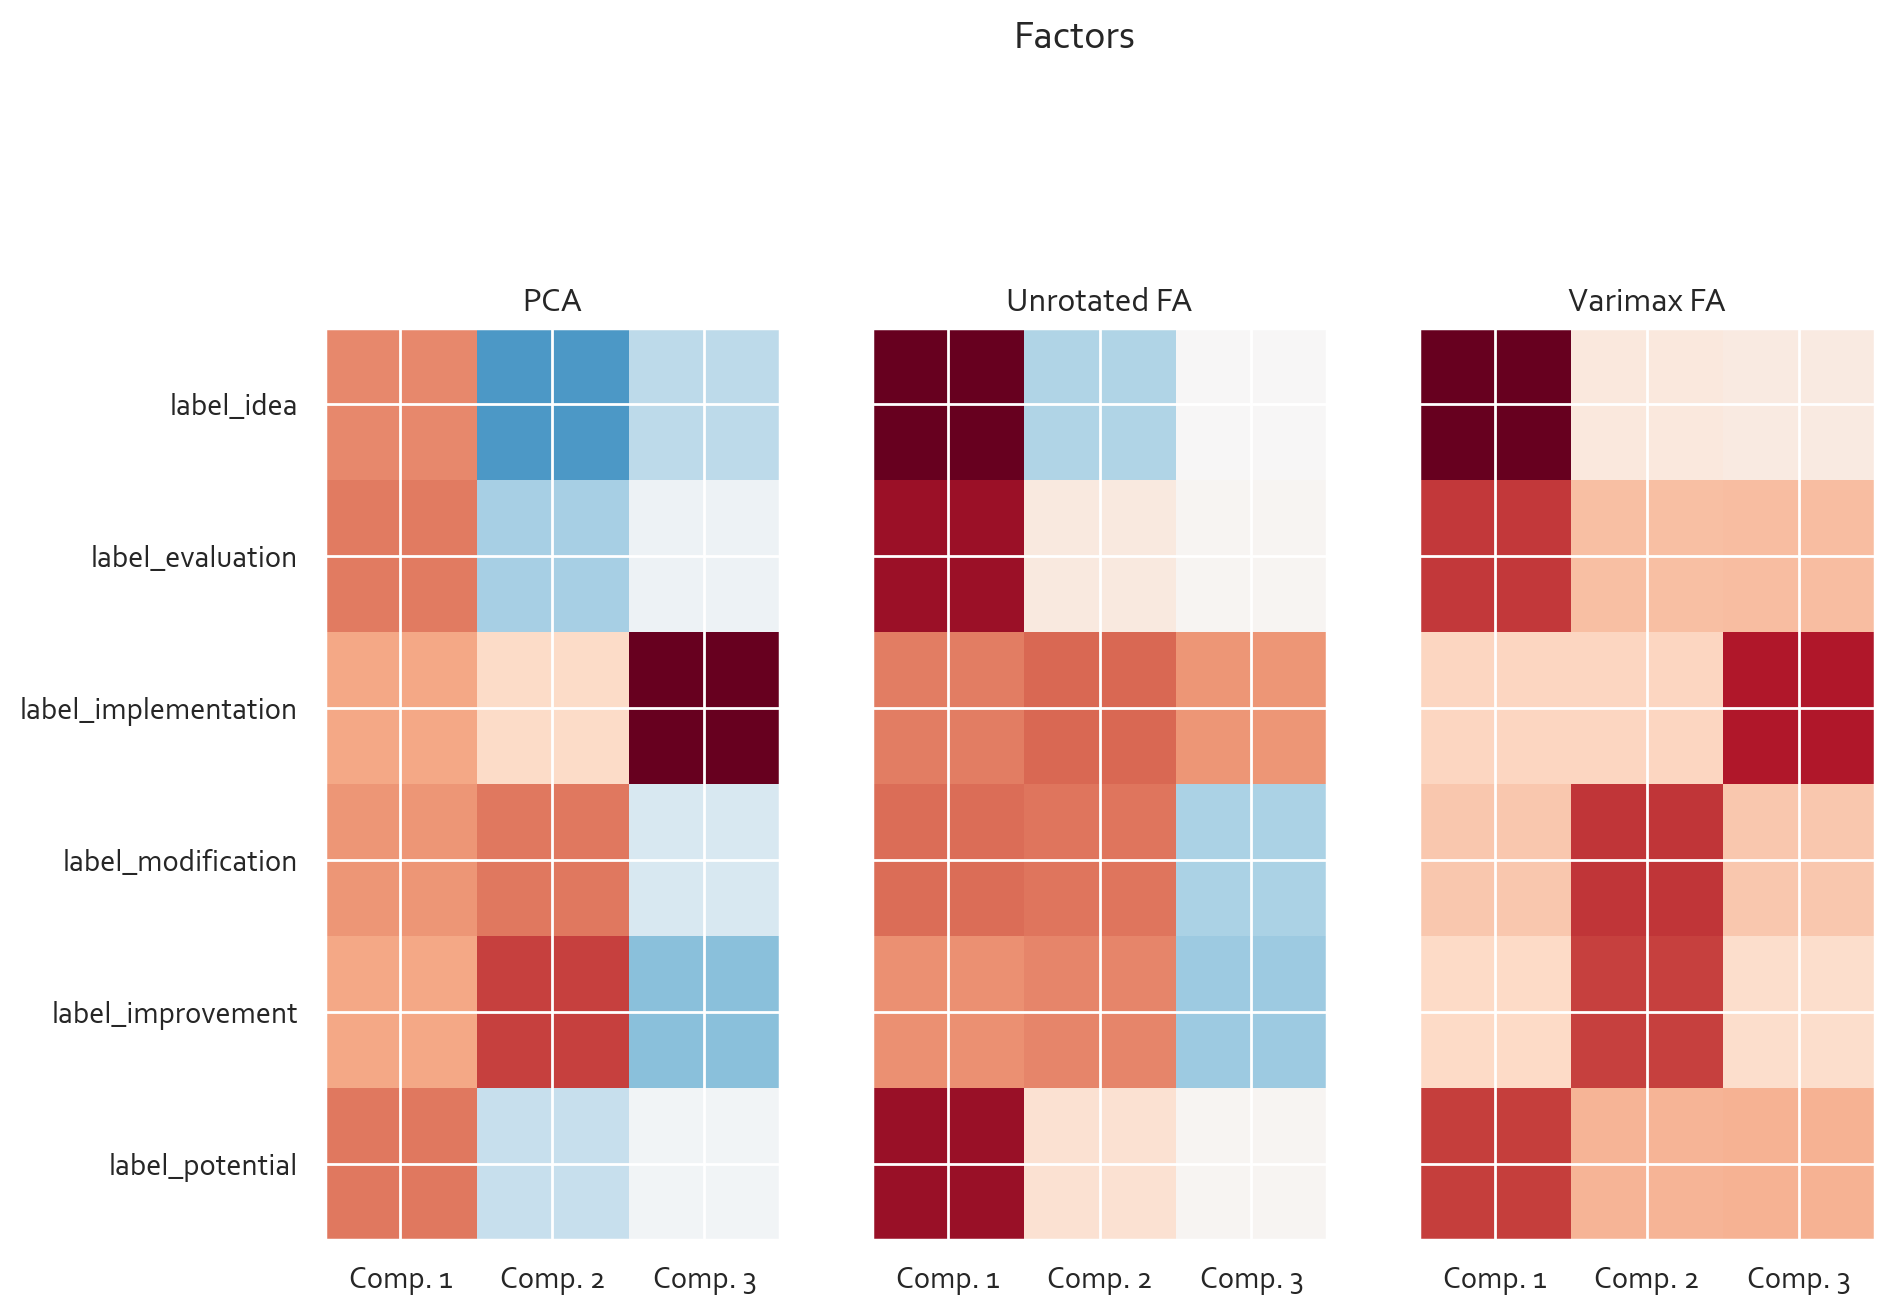

In [31]:
feat_corr, label_loadings = label_stats.plot_latent_model(n_comps=3)

In [32]:
label_stats.labels.data[['labeller','url','']]

KeyError: "[''] not in index"

In [ ]:
label_stats.labels.labels